In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_2bfbaf1a5c764b0bae90dca052fc479a.csv"
df=pd.read_csv(url,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.shape

(178, 14)

In [3]:
df=df.rename(columns={0:"Class"})
y=df[["Class"]]
y.groupby("Class")["Class"].count()

Class
1    59
2    71
3    48
Name: Class, dtype: int64

In [4]:
X=df.drop(["Class"],axis=1)
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
6,233.925873
12,207.920374
11,189.972321
0,135.077624
9,120.664018
10,101.316795
5,93.733010
1,36.943425
3,35.771637
8,30.271383


In [6]:
X_scores=scores[scores["scores"]>100]
len(X_scores)

6

In [7]:
Xp=X.iloc[:,X_scores.index]
Xp.head()

,7,13,12,1,10,11
0,3.06,1065,3.92,14.23,5.64,1.04
1,2.76,1050,3.40,13.20,4.38,1.05
2,3.24,1185,3.17,13.16,5.68,1.03
3,3.49,1480,3.45,14.37,7.80,0.86
4,2.69,735,2.93,13.24,4.32,1.04


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xp=pd.DataFrame(scaler.fit_transform(Xp))
Xp.head()

,0,1,2,3,4,5
0,1.034819,1.013009,1.847920,1.518613,0.251717,0.362177
1,0.733629,0.965242,1.113449,0.246290,-0.293321,0.406051
2,1.215533,1.395148,0.788587,0.196879,0.269020,0.318304
3,1.466525,2.334574,1.184071,1.691550,1.186068,-0.427544
4,0.663351,-0.037874,0.449601,0.295700,-0.319276,0.362177


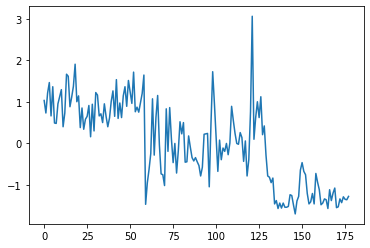

In [9]:
Col0=pd.DataFrame(Xp.iloc[:,0])
import matplotlib.pyplot as plt
plt.plot(Col0)
plt.show()

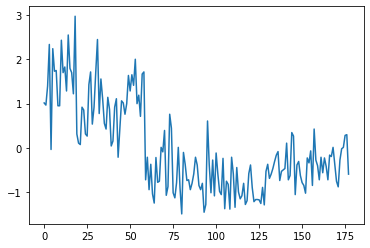

In [13]:
Col1=pd.DataFrame(Xp.iloc[:,1])
plt.plot(Col1)
plt.show()

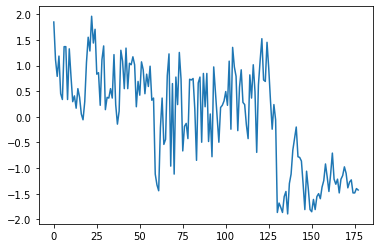

In [14]:
Col2=pd.DataFrame(Xp.iloc[:,2])
plt.plot(Col2)
plt.show()

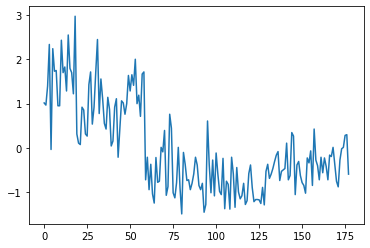

In [15]:
Col3=pd.DataFrame(Xp.iloc[:,3])
plt.plot(Col1)
plt.show()

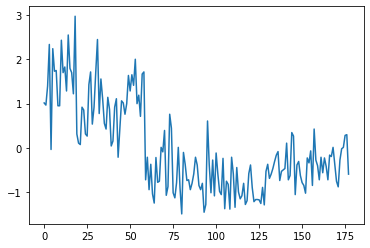

In [16]:
Col4=pd.DataFrame(Xp.iloc[:,4])
plt.plot(Col1)
plt.show()

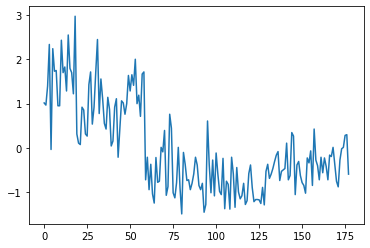

In [17]:
Col5=pd.DataFrame(Xp.iloc[:,5])
plt.plot(Col1)
plt.show()

In [10]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [145]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=1)
scores=cross_val_score(model1,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9777777777777777 +/- 0.02721655269759086


In [146]:
model1=KNeighborsClassifier(n_neighbors=2)
scores=cross_val_score(model1,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9555555555555555 +/- 0.06478835438717001


In [147]:
model1=KNeighborsClassifier(n_neighbors=3)
scores=cross_val_score(model1,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9666666666666667 +/- 0.03685138655950444


In [148]:
model1=KNeighborsClassifier(n_neighbors=4)
scores=cross_val_score(model1,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9722222222222222 +/- 0.03643021402390001


In [149]:
model1=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(model1,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9777777777777777 +/- 0.038490017945975064


In [150]:
model1=KNeighborsClassifier(n_neighbors=6)
scores=cross_val_score(model1,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9722222222222222 +/- 0.048112522432468836


In [151]:
model1=KNeighborsClassifier(n_neighbors=7)
scores=cross_val_score(model1,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9609848484848484 +/- 0.04262425045516469


#### That was enough. The best result was obtained when K=1. Next, let's try wrapping KNeighbors inside OneVsRest or OneVsOne.

In [155]:
from sklearn.multiclass import OneVsRestClassifier
model2=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9777777777777777 +/- 0.02721655269759086


In [156]:
from sklearn.multiclass import OneVsOneClassifier
model3=OneVsOneClassifier(KNeighborsClassifier(n_neighbors=1))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=6)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9722222222222222 +/- 0.02991758226185835


#### OneVsRest produced better result. Let's examine the impact of the number of nearest neighbors.

In [157]:
model2=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=2))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9666666666666667 +/- 0.03685138655950444


In [158]:
model2=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9666666666666667 +/- 0.03685138655950444


In [159]:
model2=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9611111111111111 +/- 0.045474182065958074


In [160]:
model2=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9777777777777777 +/- 0.038490017945975064


In [161]:
model2=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=6))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.966540404040404 +/- 0.03329193748829158


In [162]:
model2=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7))
scores=cross_val_score(model2,Xp,np.asarray(y).reshape(y.shape[0],),cv=4)
print("Accuracy: ",scores.mean(),"+/-",scores.std())

Accuracy:  0.9609848484848484 +/- 0.04262425045516469


#### Wrapping KNeighborsClassifier inside OneVsRest did not always resulted in better model performance. However, the experiment showed that with or without the wrapping, the KNN algorithm delivered the most accurate and most stable model when using only 1 neighbor, K=1. In that case, the KNN algorithm delivered a 97.78% accuracy, with standard deviation only 2.72%.  As the experiment shown, as the number of neighbors increased, the model's performance deteriorated. 

#### The "wine" dataset contains dense rather than sparse data, especially after standardization. However, the dataset contains a lot of noise, even after standardization. The plots of selected features show rough and irregular lines, rather than smooth lines, indicating presence of noise in the data. The results of the experiment abov confirmed what I mentioned in a blog post that although the KNN algorithm might be sensitive to noise and outliers in the data, this problem can be contained by using a low K value. 